# In this project try we will use sklearn to cluster . We are using the reuter 50_50 dataset which contains data seperatly for test and training

In [266]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [277]:
import pandas as pd
import sklearn as sk
import numpy as np
import os
import re
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pyximport; pyximport.install()
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# rcParams['figure.figsize'] = 15, 6
from sklearn.decomposition import PCA
import pylab as pl

In [268]:
trainDataUrl="Datasets/C50/C50train/"
testDataUrl="Datasets/C50/C50test/"
imageFolder="ImageFolder"

# Getting the data and putting it 

In [269]:
authorNames=os.listdir(trainDataUrl);
authorNames[0:3]

['LynnleyBrowning', 'JanLopatka', 'MichaelConnor']

In [270]:
authorArticleFiles=[];
for author in authorNames:
    baseUrl=os.path.join(trainDataUrl,author)
    authorArticleFiles.extend([os.path.join(baseUrl,fileName) for fileName in os.listdir(baseUrl)])
    baseUrl=os.path.join(testDataUrl,author)
    authorArticleFiles.extend([os.path.join(baseUrl,fileName) for fileName in os.listdir(baseUrl)])

In [271]:
authorArticleList=[]
authorLabelList=[]
for fileName in authorArticleFiles:
    author=fileName.split('/')[-2];
    authorLabelList.append(authorNames.index(author))
    filePointer=open(fileName,'r');
    authorArticleList.append(filePointer.read())
    

In [272]:
authorArticleList[100]

'Czech power producer CEZ a.s. on Friday said its nine month net profit hit 8.4 billion crowns, up from 7.4 billion for the same period last year, according to international accounting standards, as household electricity demand surged.\nCEZ\'s Director of Planning and Analysis section Petr Voboril told a news conference that higher depriciation write-offs due to the opening of new installations cut the company\'s tax obligations, and boosting its bottom line.\nThe company\'s gross profit for the period remained flat at 13.1 billion.\nCzech accounting put the firm\'s profit for the first nine months at 7.04 billion, up from 6.7 billion last year.\nCEZ said the result did not change the firm\'s profit forecast under Czech standards for the whole year, which is 8.1 billion crowns, equal to last year\'s.\nA financial statement showed CEZ wrote off 4.1 billion in the first nine months compared with 3.4 billion in the same period of 1995, and paid 4.7 billion in income tax after 5.7 billion 

# Cleaning the articles

In [273]:
def cleanArticleData(article):
    
    #Removing Html Element
    article=BeautifulSoup(article).get_text()
    
    #Removing non Letters
    article=re.sub("[^a-zA-Z]"," ",article)
    
    #Lowercase and Splitting
    articleWords=article.lower().split()
    
    #Removing Stop Words
#     ps=PorterStemmer();
    ps=WordNetLemmatizer();
    refinedArticle=[];
    for word in articleWords:
        if word not in stopwords.words("english"):
            refinedArticle.append(ps.lemmatize(word))
            

    
    return " ".join(refinedArticle)

In [ ]:
cleanArticleList=[];
for article in authorArticleList:
    cleanArticleList.append(cleanArticleData(article))

In [ ]:
cleanArticleList[0]

In [ ]:
dataList=[];
for i in range(len(cleanArticleList)):
    dataList.append([cleanArticleList[i],authorLabelList[i]])

In [ ]:
dataList[0]

# Creating a pandas DataFrame

In [13]:
dataFrame=pd.DataFrame(dataList);
dataFrame.columns=['article','authorLabel']

In [14]:
dataFrame.to_csv("ArticleDataset.csv")

In [15]:
dataFrame.head()

,article,authorLabel
0,russia metal sector key supplier world market ...,0
1,russia quietly importing western grain offset ...,0
2,russian finance minister alexander livshits wa...,0
3,russia rosneft oil firm new lease life monday ...,0
4,russia diamond could face rocky future tax off...,0


In [16]:
len(cleanArticleList)

5000

In [17]:
dataFrameArticles=dataFrame['article']
dataFrameArticles.shape

(5000,)

# Getting Features

In [157]:
vectorizer=TfidfVectorizer(analyzer="word",min_df=0.2,max_df=0.8,stop_words="english")

In [158]:
x=vectorizer.fit_transform(cleanArticleList)

In [159]:
x.shape

(5000, 87)

In [206]:
vocabulary=vectorizer.get_feature_names()

In [160]:
indices = np.argsort(vectorizer.idf_)[::-1]
features = vectorizer.get_feature_names()
top_n = 335
top_features = [features[i] for i in indices[:top_n]]
print(top_features)

['director', 'number', 'right', 'exchange', 'way', 'future', 'trading', 'level', 'big', 'like', 'growth', 'bank', 'largest', 'want', 'earlier', 'early', 'recent', 'strong', 'united', 'country', 'come', 'going', 'friday', 'china', 'including', 'issue', 'investment', 'set', 'product', 'news', 'good', 'second', 'deal', 'result', 'thursday', 'president', 'firm', 'monday', 'term', 'service', 'british', 'international', 'chairman', 'financial', 'think', 'cost', 'tuesday', 'wednesday', 'major', 'long', 'day', 'high', 'world', 'say', 'profit', 'reuters', 'sale', 'added', 'people', 'official', 'chief', 'stock', 'end', 'make', 'price', 'executive', 'government', 'plan', 'corp', 'week', 'state', 'industry', 'based', 'time', 'business', 'expected', 'group', 'told', 'month', 'share', 'billion', 'analyst', 'market', 'million', 'new', 'percent', 'company']


# Finding the ideal no of cluster

In [96]:
score=[];
for i in range(1,100):
    kmeans=KMeans(n_clusters=i);
    kmeans.fit_transform(x);
    score.append(kmeans.score(x));
    if(i%10==0):
        print("Completed i="+str(i));

Completed i=10
Completed i=20
Completed i=30
Completed i=40
Completed i=50
Completed i=60
Completed i=70
Completed i=80
Completed i=90


In [98]:
posScore=[0-scoreElement for scoreElement in score]

In [106]:
posScore[1:10]

[3561.661095646623,
 3396.0669084292776,
 3259.2985392360188,
 3173.123945025118,
 3102.9697883688996,
 3051.564208265323,
 3005.903616339043,
 2963.4793116419323,
 2925.6571861059733]

In [104]:
pd.DataFrame(posScore).to_csv("score.csv");

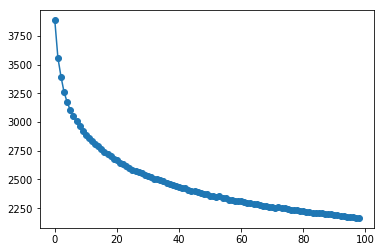

In [136]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(posScore,marker='o')

plt.show()

# Applying kmeans for 5 clusters

In [246]:
n_cluster=5;

In [247]:
kmeansCluster=KMeans(n_clusters=n_cluster,random_state=10);


In [248]:
kmeansCluster.fit_transform(x)

array([[ 1.1158113 ,  1.00302836,  1.0496779 ,  0.8938592 ,  1.0376322 ],
       [ 1.08812881,  0.91587516,  1.08789349,  0.87995319,  0.91354405],
       [ 0.91781648,  0.89803426,  1.0512877 ,  0.8340843 ,  0.97181398],
       ..., 
       [ 1.03418949,  0.67440177,  1.1364688 ,  0.90345694,  0.7822339 ],
       [ 1.09079289,  0.84314333,  1.11038965,  0.80738746,  0.91284537],
       [ 1.063559  ,  0.70462597,  1.13694243,  0.90059354,  0.7678784 ]])

In [249]:
kmeansCluster.inertia_

3173.1237759477344

In [250]:
analysisLabels=kmeansCluster.labels_

# Formatting and Analyzing the result

In [251]:
clusterDistribution=[];
clusterIndex=[];
for i in range(n_cluster):
    clusterIndex.append(np.where(analysisLabels==i));
    clusterDistribution.append(np.where(analysisLabels==i)[0].shape[0])

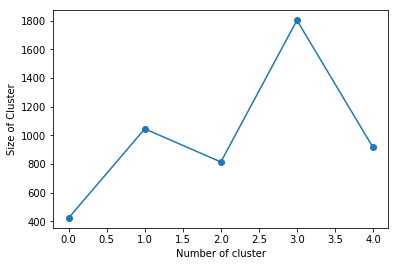

In [252]:
plt.close()
plt.plot(clusterDistribution,marker="o");
plt.xlabel("Number of cluster");
plt.ylabel("Size of Cluster");
# plt.savefig(os.path.join(imageFolder,"clusterDistribution.png"))
plt.show()
# plt.close()

In [253]:
kmeansCluster.cluster_centers_.shape

(5, 87)

# Analysing the Clusters

In [255]:

clusterDictList=[];
for i in range(n_cluster):
    clusterFeatureList=x[np.where(analysisLabels==i)];
    dist=np.sum(clusterFeatureList,axis=0);
    dist=dist.tolist()[0];
    clusterListTemp=[];
    for value,vocab in zip(dist,vocabulary):
        clusterListTemp.append([value,vocab])
    clusterListTemp.sort(reverse=True)
    clusterDictList.append(clusterListTemp)

In [256]:
clusterTopWord=[];
top_barrier=20;
for i in range(n_cluster):
    clusterTopWord.append([]);
    clusterDictList[i];
    for j in range(top_barrier):
        clusterTopWord[i].append(clusterDictList[i][j][1])

In [257]:
resultFrame=pd.DataFrame(clusterTopWord)

## Displaying top words of every cluster

In [258]:
resultFrame

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,bank,financial,percent,market,billion,investment,analyst,million,firm,share,stock,business,company,government,group,profit,new,big,state,growth
1,share,analyst,stock,company,market,percent,price,billion,million,deal,new,corp,based,business,trading,industry,exchange,expected,week,monday
2,china,official,people,state,right,government,british,united,day,country,told,future,say,issue,month,new,world,market,million,price
3,company,new,government,service,industry,state,percent,market,corp,group,billion,plan,million,world,president,told,week,deal,business,official
4,million,percent,profit,sale,company,share,billion,analyst,market,group,business,result,growth,cost,price,expected,month,british,new,executive


In [259]:
authorLabelNumpy=np.array(dataFrame['authorLabel'])
authorClusterArticle=dict();
for j in range(len(authorNames)):
    authorClusterArticle[authorNames[j]]=[];

    

In [260]:
for i in range(n_cluster):
    clusterIndices=np.where(analysisLabels==i);
    authorLabelCluster=authorLabelNumpy[clusterIndices];
    for key in authorClusterArticle:
        index=authorNames.index(key);
        authorClusterArticle[key].append(len(np.where(authorLabelCluster==index)[0]))
        

In [261]:
authorArticleClusterResult=pd.DataFrame(authorClusterArticle)

## Displaying author article by cluster

In [262]:
authorArticleClusterResult

,AaronPressman,AlanCrosby,AlexanderSmith,BenjaminKangLim,BernardHickey,BradDorfman,DarrenSchuettler,DavidLawder,EdnaFernandes,EricAuchard,...,RogerFillion,SamuelPerry,SarahDavison,ScottHillis,SimonCowell,TanEeLyn,TheresePoletti,TimFarrand,ToddNissen,WilliamKazer
0,37,15,36,1,26,16,24,0,0,2,...,0,1,12,0,2,1,2,0,0,11
1,1,42,11,2,12,44,44,17,18,54,...,2,30,15,0,17,4,33,6,3,4
2,0,0,0,83,0,0,0,0,0,0,...,3,0,53,89,0,85,0,0,0,78
3,61,26,36,12,16,20,27,60,39,33,...,95,59,18,9,39,8,54,10,73,6
4,1,17,17,2,46,20,5,23,43,11,...,0,10,2,2,42,2,11,84,24,1


In [263]:
reshapedAuthorArticleClusterResult=authorArticleClusterResult.pivot_table(columns=authorArticleClusterResult.index)

In [264]:
reshapedAuthorArticleClusterResult

,0,1,2,3,4
AaronPressman,37,1,0,61,1
AlanCrosby,15,42,0,26,17
AlexanderSmith,36,11,0,36,17
BenjaminKangLim,1,2,83,12,2
BernardHickey,26,12,0,16,46
BradDorfman,16,44,0,20,20
DarrenSchuettler,24,44,0,27,5
DavidLawder,0,17,0,60,23
EdnaFernandes,0,18,0,39,43
EricAuchard,2,54,0,33,11


In [265]:
reshapedAuthorArticleClusterResult.to_csv("AuthorClusterResult.csv")

##  PCA for cluster visualization

In [304]:
pca = PCA(n_components=2).fit(x.toarray())

In [305]:
pca_2d = pca.transform(x.toarray())

In [306]:
pcaDataFrame=pd.DataFrame(pca_2d);

In [308]:
pcaDataFrame['labels']=analysisLabels

In [309]:
pcaDataFrame.to_csv("cluster.csv");